In [1]:
results_file = 'fit_results_subpix.txt'

In [2]:
import json
with open(results_file, 'r') as f:
    results = [json.loads(l) for l in f.readlines()]

In [3]:
# Pull out each of the fitted parameters into separate lists
dx, dy, df = zip(*[l['x'] for l in results])


In [4]:
import numpy as np
dr = [np.sqrt(x**2+y**2) for x,y in zip(dx,dy)]

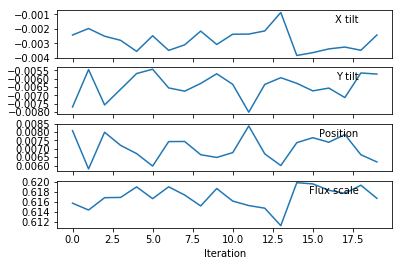

In [5]:
import matplotlib.pyplot as plt
import math

I = [i for i in range(len(results))]

f, axes = plt.subplots(4, sharex=True)
axes[0].plot(I, dx)
axes[0].text(.9,.9,'X tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[0].transAxes)
axes[0].locator_params(axis='y', nbins=6)
axes[1].plot(I, dy)
axes[1].text(.9,.9,'Y tilt',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[1].transAxes)
axes[1].locator_params(axis='y', nbins=6)
axes[2].plot(I, dr)
axes[2].text(.9,.9,'Position',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[2].transAxes)
axes[2].locator_params(axis='y', nbins=6)
axes[3].plot(I, df)
axes[3].text(.9,.9,'Flux scale',
        horizontalalignment='right', verticalalignment='top',
        transform=axes[3].transAxes)
axes[3].locator_params(axis='y', nbins=6)
axes[3].set_xlabel('Iteration')
plt.show()

In [6]:
from IPython.display import HTML, display
header = '<th>' + '</th><th>'.join(['(n={})'.format(len(results)),'mean', 's.d.', 's.e.']) + '</th>'
rows = ['<th>{}</th>'.format(label) + ''.join(
    ['<td>{:.2e}</td>'.format(s) for s in [np.mean(vals), np.std(vals), np.std(vals)/np.sqrt(len(vals))]]) for (label,vals) in [
        ('x tilx',dx),('y tilx',dy),('radius',dr),('flux',df)]]
rows.insert(0,header)

display(HTML(
    '<table><tr>{}</tr></table>'.format(
         '</tr><tr>'.join(rows)
        )
    ))

(n=20),mean,s.d.,s.e.
x tilx,-2.78e-03,7.10e-04,1.59e-04
y tilx,-6.42e-03,7.30e-04,1.63e-04
radius,7.03e-03,7.29e-04,1.63e-04
flux,6.17e-01,2.09e-03,4.67e-04
